In [1]:
# import the neccessary dependacies we will use by default
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder

Some insights into this project:
- The category of machine learning models that these fall into is _supervised learning_. Supervised learning is a type of machine learning where the model is trained on labeled data. The label in this case is the method of data breach.

The models that will be tested out will fall into the following category of machine learning:
* <u><b>Logistic Regression</b></u>: This is a supervised Learning that can be used to predict a categorical outcome. In this case, the categorical outcome is the method of the data breach. The features that will be used are: entity, year, records and organization type.
* <u><b>Decision Trees</b></u>: This is another supervised learning algorithm that can be used to predict a categorical outcome. Decision trees work by creating a tree-like structure that represents the relationships between the features and the outcomes.
* <u><b>Support Vector Machine(SVMs):</u></b> This is a supervised learning algorithm that can be used to predict both categorical and continous outcomes. SVMs work by finding the hyperplane that best seperates the data points into different classes.
* <u><b>Random Forests</u></b> This is an ensemble learning algorithm that combines multiple decision trees to improve the accuracy of the predictions.
* <u><b>Neural Networks</u></b> This is a more complex algorithm that can be used to predict both categorical and continuous outcomes. Neural Networks work by learning the relationships between the features and the outcome through a process called backpropogation.

In [2]:
# load the dataset we will be using
csv_file_path = os.path.abspath('df_1.csv');  # get the absolute path of the CSV file

df = pd.read_csv(csv_file_path);   # Read the CSV file into a dataframe
# display the head to see if the dataset works as intended
df.head(30)

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
5,5,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media,[13][14]
6,6,AerServ (subsidiary of InMobi),2018,75000,advertising,hacked,[15]
7,7,"Affinity Health Plan, Inc.",2013,344579,healthcare,lost / stolen media,[16][17]
8,8,Airtel,2019,320000000,telecommunications,poor security,[18]
9,9,Air Canada,2018,20000,transport,hacked,[19]


In [3]:
# drop the columns we don't need
df.drop(columns='Sources', inplace=True);

In [4]:
df.columns # observe that the columns list has been dropped

Index(['Unnamed: 0', 'Entity', 'Year', 'Records', 'Organization type',
       'Method'],
      dtype='object')

In [5]:
# we will need to rename the unnamed column
df.rename(columns={'Unnamed: 0' : 'Index'}, inplace=True)

In [6]:
df.head()

,Index,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,healthcare,hacked
1,1,500px,2020,14870304,social networking,hacked
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,4,Adobe Inc.,2019,7500000,tech,poor security


In [7]:
df.dtypes   # in the case of this dataframe, we have only the index as an integer datatype, whereas, everything else is considered object data

Index                 int64
Entity               object
Year                 object
Records              object
Organization type    object
Method               object
dtype: object

In [8]:
# Test out the number of unique values contained in Entity
len(df['Entity'].unique())   #there's a total of 331 unique name for comapnies

331

Regarding the column __Entity__, there's 2 options in terms of data preprocessing:
* Drop the column altogether
* Apply Hashing

In [9]:
import hashlib

#create a hash function
def hash_function(text):
    return hashlib.sha256(text.encode()).hexdigest()

# create a new column for the hashed values
df['hashed_Entity'] = df['Entity'].apply(hash_function)

#observe the hashed column
df.head()  # we have the hashed entity

,Index,Entity,Year,Records,Organization type,Method,hashed_Entity
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,500px,2020,14870304,social networking,hacked,39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,Adobe Inc.,2019,7500000,tech,poor security,4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...


In [10]:
# create a copy of the dataframe and drop the Entity column 
df_copy1 = df.drop(columns={'Entity'})

In [11]:
df_copy1 

,Index,Year,Records,Organization type,Method,hashed_Entity
0,0,2016,2200000,healthcare,hacked,c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,2020,14870304,social networking,hacked,39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,2020,175350,healthcare,poor security,d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,2013,152000000,tech,hacked,4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,2019,7500000,tech,poor security,4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...
...,...,...,...,...,...,...
347,347,2019,173000000,social network,hacked,637e6be11e5f556343bad0073ff64ddcf396a88cec35d7...
348,348,2020,200000000,financial,accidentally published,985ee128022c38982d1de4c4173f538ced9151f0517fe9...
349,349,2020,391250,healthcare,poor security,869ada24f3639cb94ed2dd22ec15aca5928cb7b7c0bc28...
350,350,2022,6400000,various,poor security,89def538702db6ab06b39b1d28f5f7980de01dd04bd0a0...


In [12]:
len(df_copy1['Organization type'].unique())   # in terms of organization type, there's 70 different unique values
df_copy1

,Index,Year,Records,Organization type,Method,hashed_Entity
0,0,2016,2200000,healthcare,hacked,c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,2020,14870304,social networking,hacked,39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,2020,175350,healthcare,poor security,d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,2013,152000000,tech,hacked,4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,2019,7500000,tech,poor security,4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...
...,...,...,...,...,...,...
347,347,2019,173000000,social network,hacked,637e6be11e5f556343bad0073ff64ddcf396a88cec35d7...
348,348,2020,200000000,financial,accidentally published,985ee128022c38982d1de4c4173f538ced9151f0517fe9...
349,349,2020,391250,healthcare,poor security,869ada24f3639cb94ed2dd22ec15aca5928cb7b7c0bc28...
350,350,2022,6400000,various,poor security,89def538702db6ab06b39b1d28f5f7980de01dd04bd0a0...


In [13]:
# remove the special characters
df_copy1['Organization type'] = df_copy1['Organization type'].str.replace(',', '_')  # replace the cases of ',' with '_'.
df_copy1['Organization type'] = df_copy1['Organization type'].str.replace(' ', '_') # we also replace the cases of spacing with '_'.
df_copy1['Organization type'] = df_copy1['Organization type'].str.replace('__', '_')  # replace all instances of __ with _

Before encoding the organization type, I've copied the df to keep the original data intact. I'm dropping the hashed_Entity column as it is not needed for visualizing – we want to focus on industries and not individual companies.

In [14]:
df_vis = df_copy1
#drop the hashed entity column
df_vis.drop(columns={'hashed_Entity'}, inplace=True)
df_vis

,Index,Year,Records,Organization type,Method
0,0,2016,2200000,healthcare,hacked
1,1,2020,14870304,social_networking,hacked
2,2,2020,175350,healthcare,poor security
3,3,2013,152000000,tech,hacked
4,4,2019,7500000,tech,poor security
...,...,...,...,...,...
347,347,2019,173000000,social_network,hacked
348,348,2020,200000000,financial,accidentally published
349,349,2020,391250,healthcare,poor security
350,350,2022,6400000,various,poor security


Checking if the Year column is well formatted (should be a year like 2016, or 2019, not 2016-2019). If not, we'll need to do some data cleaning.

In [15]:
#Check if any value in the year column is null
print("Null values: ", df_vis['Year'].isnull().values.any())  # there are no null values in the year column

#Check if any value in the year column is not well formatted (i.e. not a number)
print("Non numeric values: ", df_vis['Year'].str.isnumeric().values.any())  # there are values that are not numeric

#print out all the values in the year column that are not numeric
print("Non numeric values:")
df_vis[~df_vis['Year'].str.isnumeric()]

Null values:  False
Non numeric values:  True
Non numeric values:


,Index,Year,Records,Organization type,Method
94,94,2019-2020,"9,000,000 (approx) - basic booking, 2208 (cred...",transport,hacked
96,96,2018-2019,2000000,restaurant,hacked
144,144,2014 and 2015,363000,hotel,hacked


There are 3 values in the Year column that are not well formed – we also will need to fix the Records column for similar formatting issues.

In [18]:
'''
Modify df_vis:
for each value in the year column that is not numeric:
    record the last year listed in the year column (i.e. the last 4 characters)
    record the first year listed in the year column (i.e. the first 4 characters)
change the year column of this entry to the first 4 characters (the first year)
for each year between the first year and the last year:
    add a new entry to the dataframe with the same values as the entry that was changed, except for the year column, which will be the year in question
'''
last_row_index = df_vis.tail(1).index[0]
# Create an empty list to store modified rows
new_rows = []

# Iterate through the DataFrame
for index, row in df_vis.iterrows():
    year_value = row['Year']
    
    # Check if the year is not numeric
    if not year_value.isnumeric():
        # Extract the first and last year
        first_year = int(year_value[:4])
        last_year = int(year_value[-4:])

        # Change the year column to the first year
        df_vis.loc[index, 'Year'] = str(first_year)
        
        #Create new rows for each year between the first and last year
        for year in range(first_year + 1, last_year + 1):
            last_row_index+=1 # Increment the index of the last row
            new_row = row.copy()  # Create a copy of the current row
            new_row['Year'] = str(year)
            new_row['Index'] = last_row_index
            new_rows.append(new_row) # Append the new row to the list

# Concatenate the new rows with the original DataFrame
new_rows_df = pd.DataFrame(new_rows)

df_vis = pd.concat([df_vis, new_rows_df], ignore_index=True)


df_vis



,Index,Year,Records,Organization type,Method
0,0,2016,2200000,healthcare,hacked
1,1,2020,14870304,social_networking,hacked
2,2,2020,175350,healthcare,poor security
3,3,2013,152000000,tech,hacked
4,4,2019,7500000,tech,poor security
...,...,...,...,...,...
350,350,2022,6400000,various,poor security
351,351,2022,95000,retail,accidentally published
352,352,2020,"9,000,000 (approx) - basic booking, 2208 (cred...",transport,hacked
353,353,2019,2000000,restaurant,hacked


The Year's column is fixed, but I suspect this approach may be exaggerating the number of breaches in 2019.
Instead, I will fix the Records column, and then split (divide?) the number of records by the number of years the breach lasted.


In [15]:
df_copy1['Organization type'].unique()

array(['healthcare', 'social_networking', 'tech', 'advertising',
       'telecommunications', 'transport', 'web', 'financial', 'gaming',
       'tech_retail', 'telecoms', 'dating', 'government', 'academic',
       'retail', 'educational_services', 'gambling', 'banking', 'game',
       'energy', 'background_check', 'information_technology',
       'hosting_provider', 'military', 'health', 'consulting_accounting',
       'political', 'messaging_app', 'restaurant',
       'financial_credit_reporting', 'data_broker', 'social_network',
       'financial_service_company', 'Information_Security',
       'personal_and_demographic_data_about_residents_and_their_properties_of_US',
       'hotel', 'humanitarian', 'special_public_corporation', 'shopping',
       'local_search', 'mobile_carrier', 'publisher_(magazine)',
       'government_healthcare', 'software', 'web_military',
       'online_shopping', 'genealogy', 'media', 'telecom',
       'QR_code_payment', 'fashion', 'Clinical_Laboratory',
  

In [16]:
le = LabelEncoder()

# implement label encoding on the Organization type column
le.fit(df_copy1['Organization type'])   # fit the data we want to train the encoder on
df_copy1['Organization type'] = le.transform(df_copy1['Organization type'])
# observe how the column 'Organization Type' has changed
df_copy1.head()

,Index,Year,Records,Organization type,Method,hashed_Entity
0,0,2016,2200000,30,hacked,c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,2020,14870304,53,hacked,39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,2020,175350,30,poor security,d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,2013,152000000,56,hacked,4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,2019,7500000,56,poor security,4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...


In [17]:
df_copy1.dtypes   # as we can see, the Organization type changed from Object --> integer datatype

Index                 int64
Year                 object
Records              object
Organization type     int64
Method               object
hashed_Entity        object
dtype: object

In [18]:
# observe the label frequency, to gain an understanding of outliers and inlier values
df_copy1['Organization type'].value_counts()    # some values to note: 7 repeats 13 times, 18 repeats 38  times, 23 repeats 12 times, 25 repeats 30 times, 30 repeats 47 times, 49 repeats 27 times.

Organization type
65    53
30    47
18    38
25    30
49    27
      ..
33     1
55     1
50     1
35     1
64     1
Name: count, Length: 70, dtype: int64

In [19]:
df_copy1['Method']

0                      hacked
1                      hacked
2               poor security
3                      hacked
4               poor security
                ...          
347                    hacked
348    accidentally published
349             poor security
350             poor security
351    accidentally published
Name: Method, Length: 352, dtype: object

In [20]:
df_copy1['Method'].unique()

array(['hacked', 'poor security', 'lost / stolen media',
       'accidentally published', 'inside job, hacked',
       'lost / stolen computer', 'unknown', 'unsecured S3 bucket',
       'inside job', nan, 'accidentally uploaded',
       'poor security / hacked', 'Poor security', 'unprotected api',
       'poor security/inside job', 'data exposed by misconfiguration',
       'zero-day vulnerabilities', 'intentionally lost',
       'misconfiguration/poor security', 'ransomware hacked',
       'rogue contractor', 'improper setting, hacked',
       'hacked/misconfiguration',
       'publicly accessible Amazon Web Services (AWS) server',
       'accidentally exposed', 'social engineering'], dtype=object)

In [21]:
""# seems like the method column contains certain NaN values and certain Unknown values, we will need to determine whether we replace such values or drop them in its entirety
df_copy1['Method'].value_counts()

Method
hacked                                                  192
poor security                                            43
lost / stolen media                                      33
accidentally published                                   21
inside job                                               19
lost / stolen computer                                   16
unknown                                                   7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
misconfiguration/poor security                            1
unprotected api                  

In [22]:
"""Two changes needs to be made regarding the method column
    1. Replace the "Unknown" value with the most frequently repeated word
    2. Drop any NaN values if it exists
"""

most_frequent_word = df_copy1['Method'].value_counts().index[0]
#replace all occurences of "Unknown" with "Hacked"
df_copy1['Method'].replace('unknown', most_frequent_word, inplace=True)

# drop any NaN values
df_copy1.dropna(inplace=True)

# Print the dataframe
df_copy1


,Index,Year,Records,Organization type,Method,hashed_Entity
0,0,2016,2200000,30,hacked,c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,2020,14870304,53,hacked,39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,2020,175350,30,poor security,d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,2013,152000000,56,hacked,4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,2019,7500000,56,poor security,4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...
...,...,...,...,...,...,...
347,347,2019,173000000,52,hacked,637e6be11e5f556343bad0073ff64ddcf396a88cec35d7...
348,348,2020,200000000,18,accidentally published,985ee128022c38982d1de4c4173f538ced9151f0517fe9...
349,349,2020,391250,30,poor security,869ada24f3639cb94ed2dd22ec15aca5928cb7b7c0bc28...
350,350,2022,6400000,64,poor security,89def538702db6ab06b39b1d28f5f7980de01dd04bd0a0...


In [23]:
# let's verify if the method column contains any nan/null values
df_copy1['Method'].isnull().all()   # seems that none of the values here contain any more null values

False

In [24]:
print(list(df_copy1['Method'].unique()))   # based on the list, we can see that the Method column doesn't contain unknown anymore.
list(df_copy1['Method'].value_counts())   # we also gain insight into the frequency of the methods being repeated, there's 24 methods, therefore, the label encoding will range from 0-23

['hacked', 'poor security', 'lost / stolen media', 'accidentally published', 'inside job, hacked', 'lost / stolen computer', 'unsecured S3 bucket', 'inside job', 'accidentally uploaded', 'poor security / hacked', 'Poor security', 'unprotected api', 'poor security/inside job', 'data exposed by misconfiguration', 'zero-day vulnerabilities', 'intentionally lost', 'misconfiguration/poor security', 'ransomware hacked', 'rogue contractor', 'improper setting, hacked', 'hacked/misconfiguration', 'publicly accessible Amazon Web Services (AWS) server', 'accidentally exposed', 'social engineering']


[198, 43, 33, 20, 19, 16, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [25]:
# prior to implementing label encoding, we will need to clear up the string of some grammatical issues that will cause mismatched data when we train the model otherwise

# convert all uppercase letters to lowercase
df_copy1['Method'] = df_copy1['Method'].str.lower()

# replace all spaces with "_"
df_copy1['Method'] = df_copy1['Method'].str.replace(' ', '_')

# replace all slash signs with "_"
df_copy1['Method'] = df_copy1['Method'].str.replace('/', '_')

# replace all __ and ___ with _
df_copy1['Method'] = df_copy1['Method'].str.replace('___', '_')
df_copy1['Method'] = df_copy1['Method'].str.replace('__', '_')

# check the updated dataframe
list(df_copy1['Method'].unique())

['hacked',
 'poor_security',
 'lost_stolen_media',
 'accidentally_published',
 'inside_job,_hacked',
 'lost_stolen_computer',
 'unsecured_s3_bucket',
 'inside_job',
 'accidentally_uploaded',
 'poor_security_hacked',
 'unprotected_api',
 'poor_security_inside_job',
 'data_exposed_by_misconfiguration',
 'zero-day_vulnerabilities',
 'intentionally_lost',
 'misconfiguration_poor_security',
 'ransomware_hacked',
 'rogue_contractor',
 'improper_setting,_hacked',
 'hacked_misconfiguration',
 'publicly_accessible_amazon_web_services_(aws)_server',
 'accidentally_exposed',
 'social_engineering']

In [26]:
# now the method column is ready for label encoding preprocessing, since we already called on the label encoder previously, we can reuse it
le.fit(df_copy1['Method'])  # train the label encoder on the column data we want to train
df_copy1['Method'] = le.transform(df_copy1['Method'])
df_copy1   # observe that method has been successfully encoded by label

,Index,Year,Records,Organization type,Method,hashed_Entity
0,0,2016,2200000,30,4,c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,2020,14870304,53,4,39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,2020,175350,30,13,d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,2013,152000000,56,4,4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,2019,7500000,56,13,4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...
...,...,...,...,...,...,...
347,347,2019,173000000,52,4,637e6be11e5f556343bad0073ff64ddcf396a88cec35d7...
348,348,2020,200000000,18,1,985ee128022c38982d1de4c4173f538ced9151f0517fe9...
349,349,2020,391250,30,13,869ada24f3639cb94ed2dd22ec15aca5928cb7b7c0bc28...
350,350,2022,6400000,64,13,89def538702db6ab06b39b1d28f5f7980de01dd04bd0a0...


In [27]:
# let's take a look at the minimum and maximum values
print('min:', min(df_copy1['Method']))
print('max:', max(df_copy1['Method']))  # the smallest value is represented using 0 and the largest value is represented using 22

min: 0
max: 22


In [28]:
df_copy1['Method'].value_counts()  # judging by the values shown here, seems like 4 represents 'hacked'

Method
4     198
13     44
11     33
1      20
7      19
10     16
6       2
15      2
2       1
14      1
20      1
21      1
3       1
22      1
9       1
12      1
17      1
18      1
8       1
5       1
16      1
0       1
19      1
Name: count, dtype: int64

In [30]:
# Use the inverse_transform method if you need to decode the method back to the original text
original_text = le.inverse_transform([4])
original_text[0]

'hacked'

In [ ]:
df_copy1.dtypes  # reobserve the data, as we can see, the columns that are of object datatype needs to be changed

Index                 int64
Year                 object
Records              object
Organization type     int32
Method                int32
hashed_Entity        object
dtype: object

In [ ]:
object_to_numeric = ['Year', 'Records', 'hashed_Entity']
df_copy1[object_to_numeric] = df_copy1[object_to_numeric].apply(pd.to_numeric, errors="ignore", axis=1)   # we have successfully converted the dataframe from object to float, this ensures it's ready to be trained using machine learning model
df_copy1.dtypes

Index                 int64
Year                 object
Records              object
Organization type     int32
Method                int32
hashed_Entity        object
dtype: object

In [ ]:
df_copy1

,Index,Year,Records,Organization type,Method,hashed_Entity
0,0,2016,2200000,30,4,c3a872f67b2c21449ed696e019d008cbb15b384ed63164...
1,1,2020,14870304,53,4,39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...
2,2,2020,175350,30,13,d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...
3,3,2013,152000000,56,4,4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...
4,4,2019,7500000,56,13,4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...
...,...,...,...,...,...,...
347,347,2019,173000000,52,4,637e6be11e5f556343bad0073ff64ddcf396a88cec35d7...
348,348,2020,200000000,18,1,985ee128022c38982d1de4c4173f538ced9151f0517fe9...
349,349,2020,391250,30,13,869ada24f3639cb94ed2dd22ec15aca5928cb7b7c0bc28...
350,350,2022,6400000,64,13,89def538702db6ab06b39b1d28f5f7980de01dd04bd0a0...


In [ ]:
df_copy1.isnull().values.any()   # the entirety of the dataframe does not contain any null values.

False

In [ ]:
df.columns

Index(['Index', 'Entity', 'Year', 'Records', 'Organization type', 'Method',
       'hashed_Entity'],
      dtype='object')

Marks the end of the data preprcoessing.

In [ ]:
# using the original tabel where the name of the Entities as well as the hashed entities are together, using that we can create a lookup table in the form of a dictionary

dictionary = {}  # create a dictionary that maps the hashed company names to the original company names

for index, row in df.iterrows():
    hashed_company_name = row["hashed_Entity"]
    original_company_name = row["Entity"]
    dictionary[hashed_company_name] = original_company_name
    

In [ ]:
dictionary   # we have successfully created a dictionary that maps the hashed values to the name of the original companues

{'c3a872f67b2c21449ed696e019d008cbb15b384ed63164e81323988f392393b8': '21st Century Oncology',
 '39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e11567530c81d23dc0e8': '500px',
 'd37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8f7981228bc35b52cff': 'Accendo Insurance Co.',
 '4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebccc3fc50eeddde049c4': 'Adobe Systems Incorporated',
 '4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117693744b8be8c7b7fcf': 'Adobe Inc.',
 'af361c9abf383a77a99945a0c69f6f20c2c3d9071a110fabef8f453a67a2518a': 'Advocate Medical Group',
 'a911e109f9deb9670641003e51f943c3b68e87b9fb90ebb159aa0112df8e031c': 'AerServ (subsidiary of InMobi)',
 '122698080b869d034496ec8437ef1a36bc1991344fc5b412b8bb655b6a5033e6': 'Affinity Health Plan, Inc.',
 '8f96973ac6f41ec98492711f4bb5d7197df6fd62d3216f488a269968b0d8dd07': 'Airtel',
 'b81e4231ad14925e7b2a1e20687aae512273423e7ffe9fb8c9d6d37fbd04ade8': 'Air Canada',
 '5ab772f3a8ed175a9a525b6deda16620558ddf98a281a3cd3dc62a80da92c4c5': 'Amazon Japan G.K.',
 '3

In [ ]:
# add a new column to the DataFrame that maps the hashed company names to the original company names
df_copy1["original_Entity"] = df["hashed_Entity"].apply(lambda x: dictionary[x])

In [ ]:
df_copy1

,Index,Year,Records,Organization type,Method,hashed_Entity,original_Entity
0,0,2016,2200000,30,4,c3a872f67b2c21449ed696e019d008cbb15b384ed63164...,21st Century Oncology
1,1,2020,14870304,53,4,39b1d7f5c52ecec4511c7d93214a3dc33915fcb67c51e1...,500px
2,2,2020,175350,30,13,d37b82c7c3fef3eb56a05bc88697bd64c489f8b13b9ed8...,Accendo Insurance Co.
3,3,2013,152000000,56,4,4ea8e5179ec6c6866f040ebfa23a41946cb05bd37b5ebc...,Adobe Systems Incorporated
4,4,2019,7500000,56,13,4e2eb72d6ffd4a841309dcd87b646d2408ac7394956117...,Adobe Inc.
...,...,...,...,...,...,...,...
347,347,2019,173000000,52,4,637e6be11e5f556343bad0073ff64ddcf396a88cec35d7...,Zynga
348,348,2020,200000000,18,1,985ee128022c38982d1de4c4173f538ced9151f0517fe9...,Unknown agency(believed to be tied to United S...
349,349,2020,391250,30,13,869ada24f3639cb94ed2dd22ec15aca5928cb7b7c0bc28...,National Health Information Center (NCZI) of S...
350,350,2022,6400000,64,13,89def538702db6ab06b39b1d28f5f7980de01dd04bd0a0...,50 companies and government institutions


In [42]:
# convert all uppercase letters to lowercase
df_vis['Method'] = df_vis['Method'].str.lower()

# replace all spaces with "_"
df_vis['Method'] = df_vis['Method'].str.replace(' ', '_')

# replace all slash signs with "_"
df_vis['Method'] = df_vis['Method'].str.replace('/', '_')

# replace all __ and ___ with _
df_vis['Method'] = df_vis['Method'].str.replace('___', '_')
df_vis['Method'] = df_vis['Method'].str.replace('__', '_')

# Checking the Records column

# Use the 'pd.to_numeric' function to check if the values in 'Records' can be converted to numbers
numeric_records = pd.to_numeric(df_vis['Records'], errors='coerce')

# Create a boolean mask where 'numeric_records' is NaN (indicating non-numeric values)
non_numeric_rows = df_vis[numeric_records.isna()]

# Print the rows where 'Records' contains non-numeric values
print(non_numeric_rows)

# Calculate the mean of 'Records' in year with NaN values
mean_records_2019 = df_vis[df_vis['Year'] == '2019']['Records'].mean()

df_vis.at[94, 'Records'] = mean_records_2019

# Create a boolean mask where 'numeric_records' is NaN (indicating non-numeric values)
non_numeric_rows = df_vis[numeric_records.isna()]

# Print the rows where 'Records' contains non-numeric values
print("After replacing NaN Records:")
print(non_numeric_rows)
#df_vis.head()

Empty DataFrame
Columns: [Index, Year, Records, Organization type, Method, hashed_Entity]
Index: []
After replacing NaN Records
Empty DataFrame
Columns: [Index, Year, Records, Organization type, Method, hashed_Entity]
Index: []


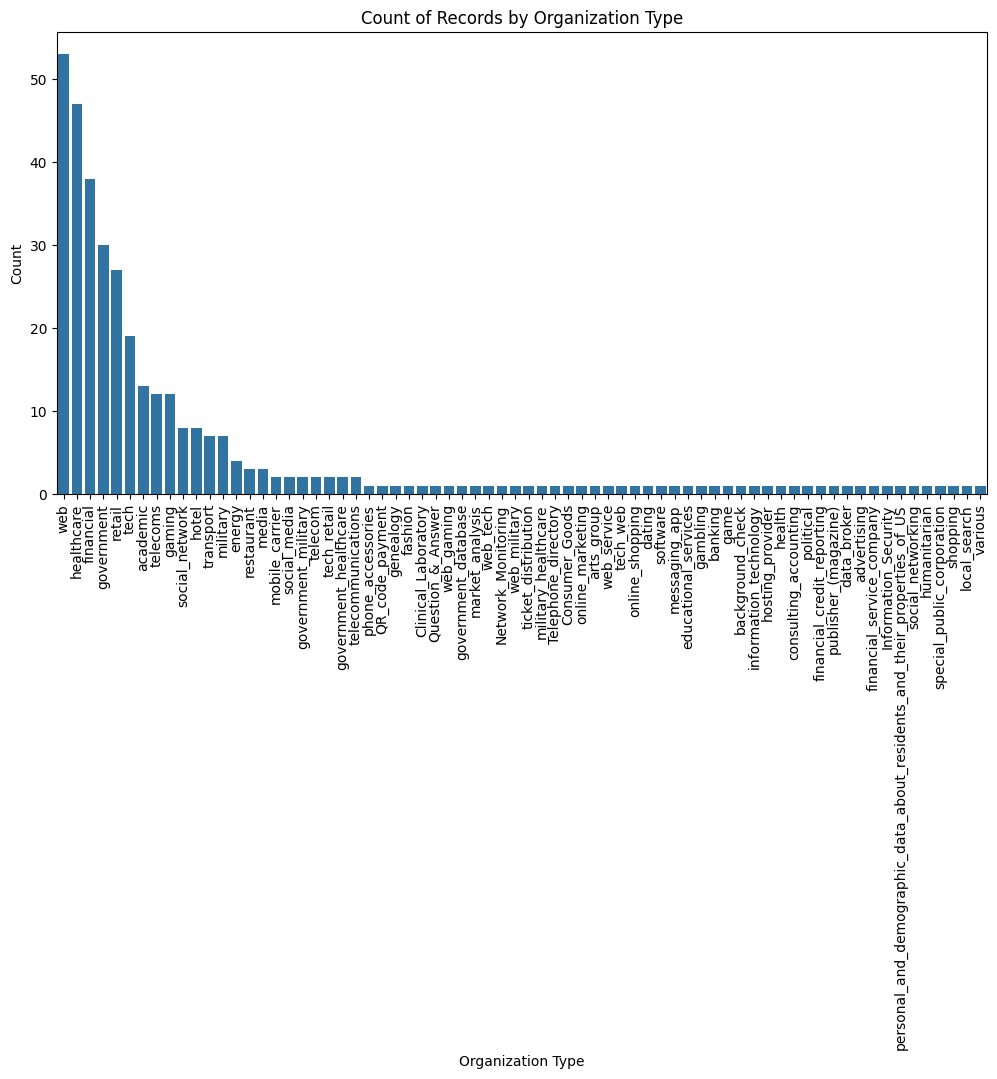

In [34]:
plt.figure(figsize=(12, 6))

# Sort the data by count in descending order
order = df_vis['Organization type'].value_counts().index

sns.countplot(data=df_vis, x='Organization type', order=order)
plt.title('Count of Records by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

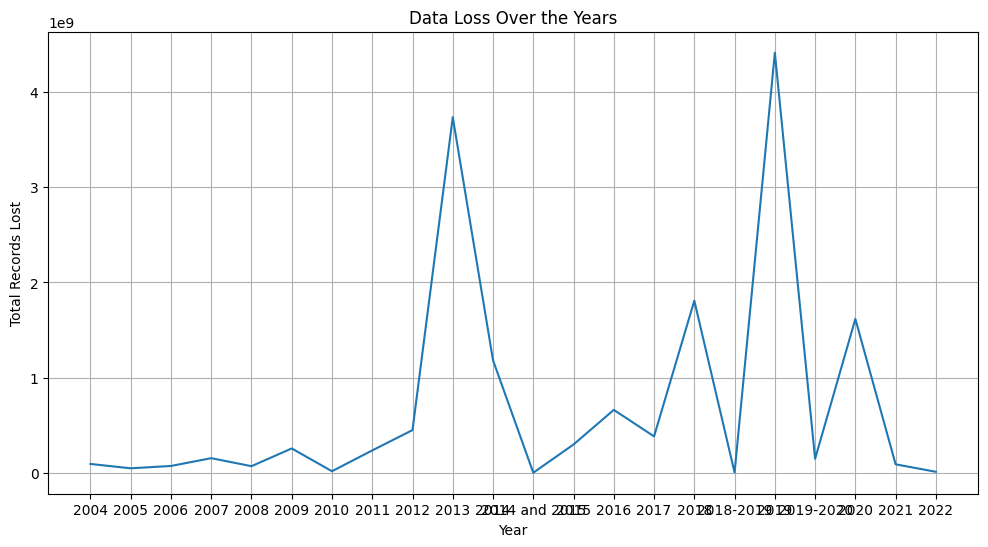

In [43]:
plt.figure(figsize=(12, 6))

# Group the data by year and calculate the total records lost in each year
data_lost_by_year = df_vis.groupby('Year')['Records'].sum().reset_index()

# Create a line plot to visualize data loss over the years
sns.lineplot(data=data_lost_by_year, x='Year', y='Records')
plt.title('Data Loss Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Records Lost')
plt.grid(True)
plt.show()